## Seting up node attributes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import defaultdict
import csv
import networkx as nx
import nxviz as nxv
import community

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
with open('../Data/AccNodeList.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

# Read in the edgelist file
with open('../Data/AccEdgeFile.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]
# more work to do on edge list - need a weight col which is a count of Originators association with Recipients

In [3]:
G = nx.Graph() # Initialize a Graph object
G.add_nodes_from(node_names) # Add nodes to the Graph
G.add_edges_from(edges) # Add edges to the Graph
print(nx.info(G)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 281
Number of edges: 2378
Average degree:  16.9253


In [4]:
ncs_dict = {}
department_dict = {}
level_dict = {}
location_dict = {}
gender_dict = {}
tenure_dict = {}
deg_dict = {}

In [5]:
#node_names

In [6]:
for node in nodes: # Loop through the list, one row at a time
    department_dict[node[0]] = node[1]
    level_dict[node[0]] = node[2]
    location_dict[node[0]] = node[3]
    gender_dict[node[0]] = node[4]
    tenure_dict[node[0]] = node[5]
    ncs_dict[node[0]] = node[8]
    deg_dict = nx.degree_centrality(G)

In [7]:

nx.set_node_attributes(G, department_dict,'department')
nx.set_node_attributes(G, level_dict, 'level')
nx.set_node_attributes(G, location_dict, 'location')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, tenure_dict, 'tenure')
nx.set_node_attributes(G, ncs_dict, 'ncs')
nx.set_node_attributes(G, deg_dict, 'deg_cen')

In [8]:
#for n in G.nodes():
   # print(n, G.nodes[n]['ncs'])

In [9]:
#G.nodes()

In [10]:
#nx.draw(G, with_labels=True)

In [11]:
#G.nodes.data()

In [12]:
#G.edges.data()

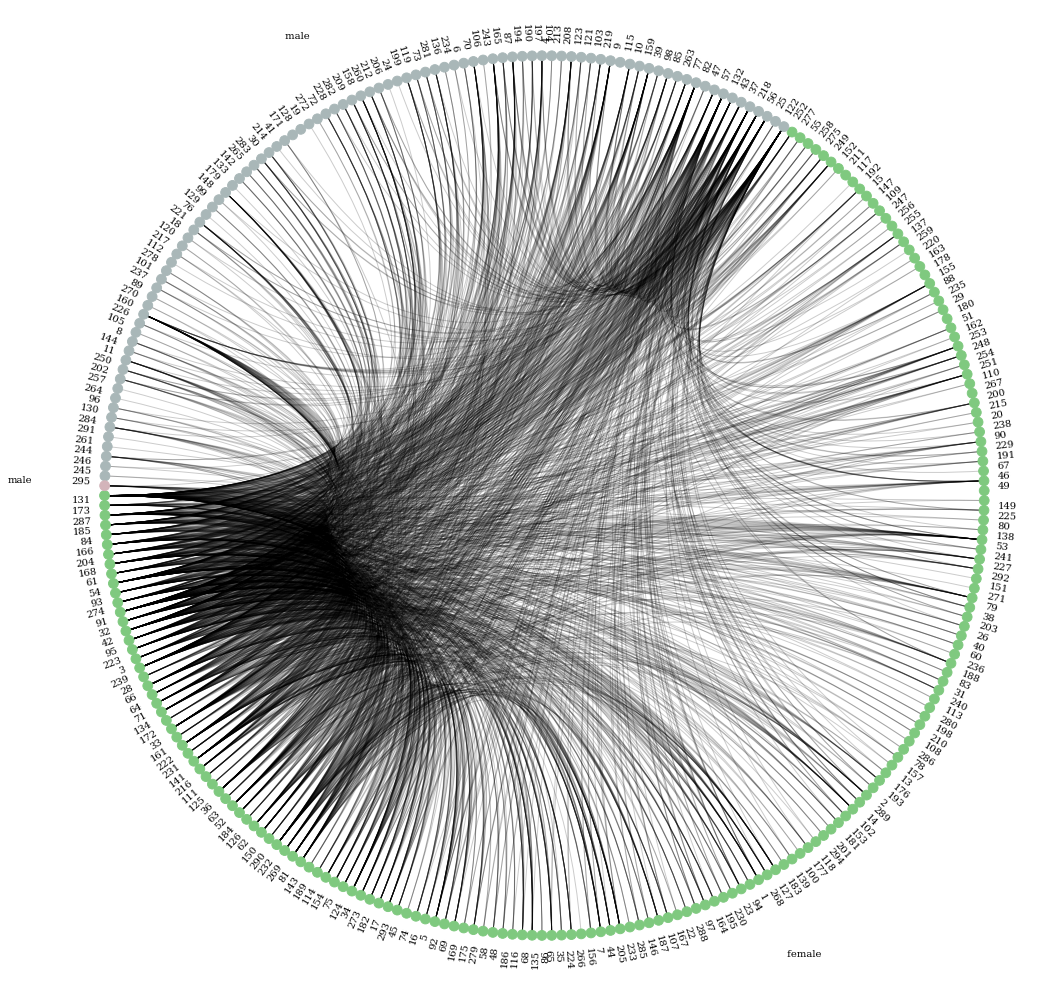

In [13]:
cmt = community.best_partition(G, weight='Weight')
c = nxv.CircosPlot(G, node_color='gender', node_grouping='gender',
                   #edge_width=(edges['Weight'] / edges['Weight'].quantile(0.97)).tolist(),
                   node_labels=True, node_label_layout='rotation',
                   group_label_position="middle", 
                   group_label_offset=12,
                   figsize=(30,18))
c.draw()

## https://blog.datasciencedojo.com/network-theory-game-of-thrones/

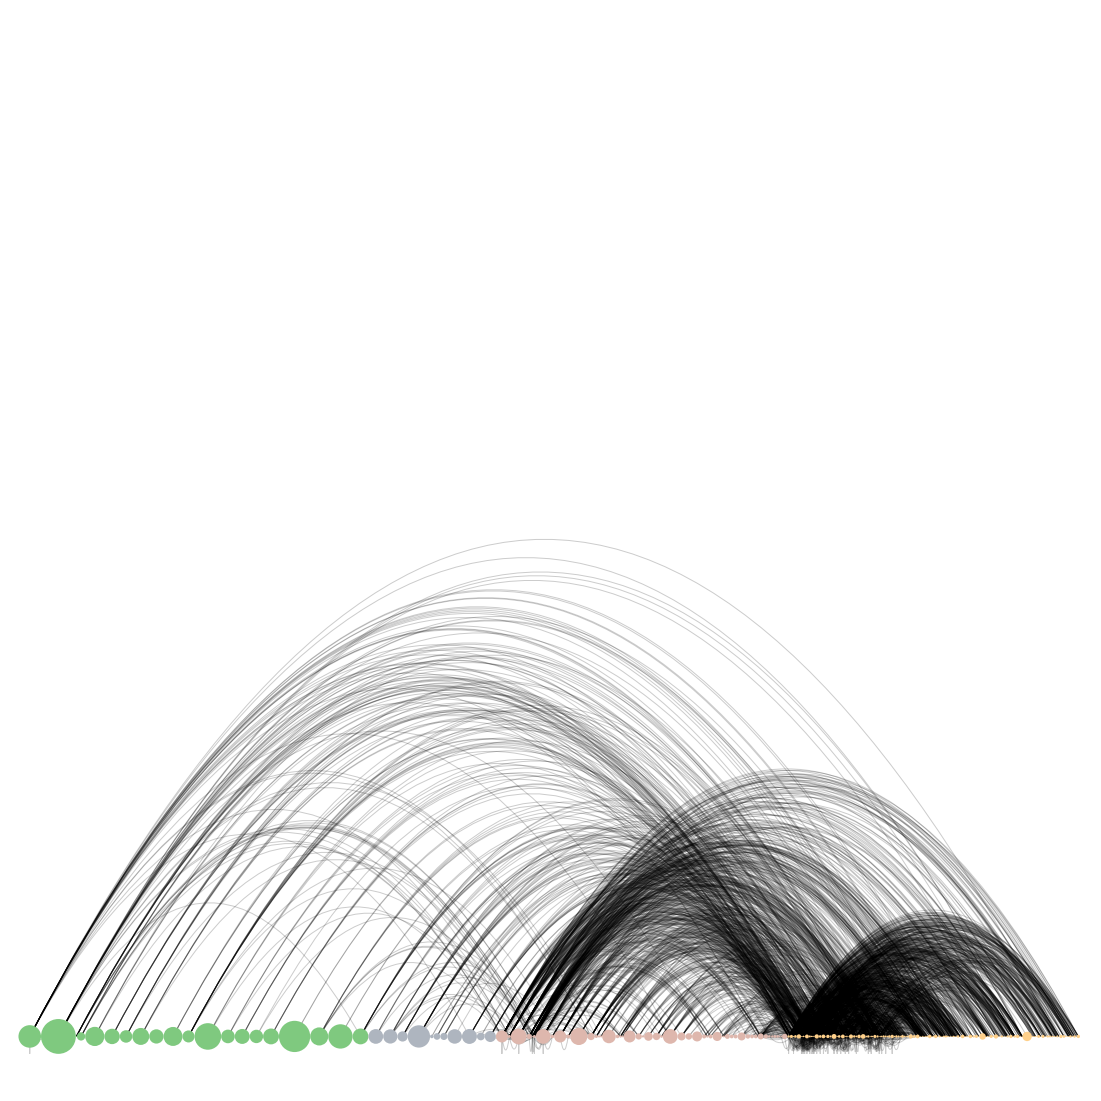

In [14]:
deg_cen = nx.degree_centrality(G)
a = nxv.ArcPlot(G, node_color='department', node_grouping='department', 
                node_size=[20*G.nodes[n]['deg_cen'] for n in G.nodes], 
                #edge_width=(edges['Weight'] / edges['Weight'].quantile(.95)).tolist(),
                figsize=(20,20))
a.draw()

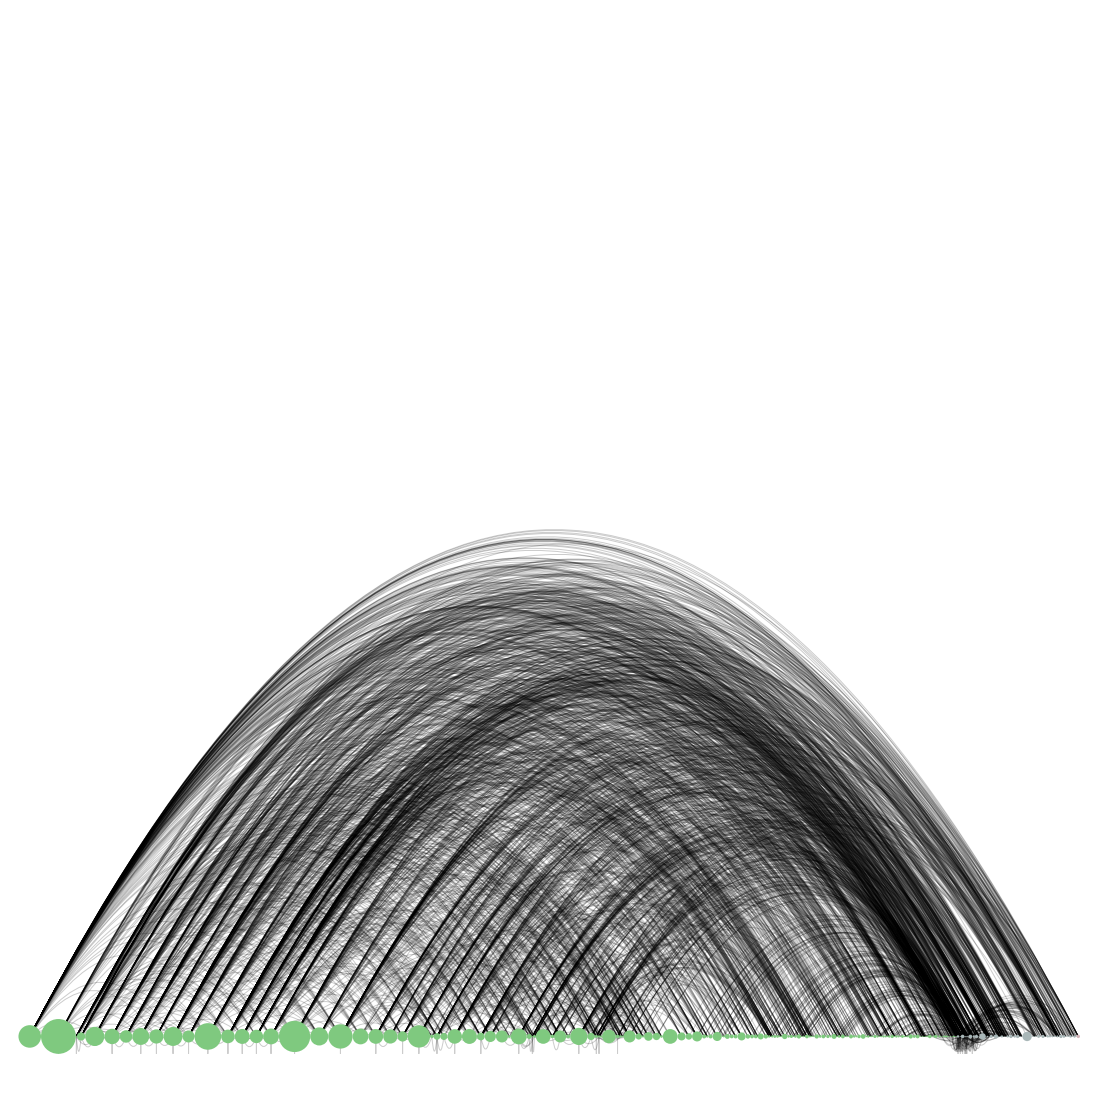

In [15]:
deg_cen = nx.degree_centrality(G)
a = nxv.ArcPlot(G, node_color='gender', node_grouping='gender', 
                node_size=[20*G.nodes[n]['deg_cen'] for n in G.nodes], 
                #edge_width=(edges['Weight'] / edges['Weight'].quantile(.95)).tolist(),
                figsize=(20,20))
a.draw()

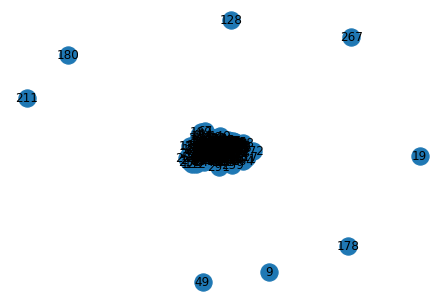

In [16]:
nx.draw(G, with_labels=True)

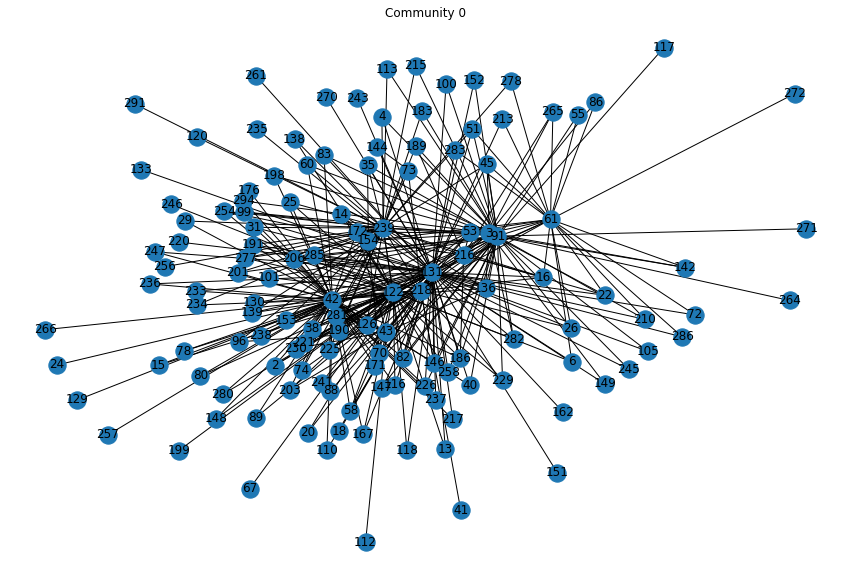

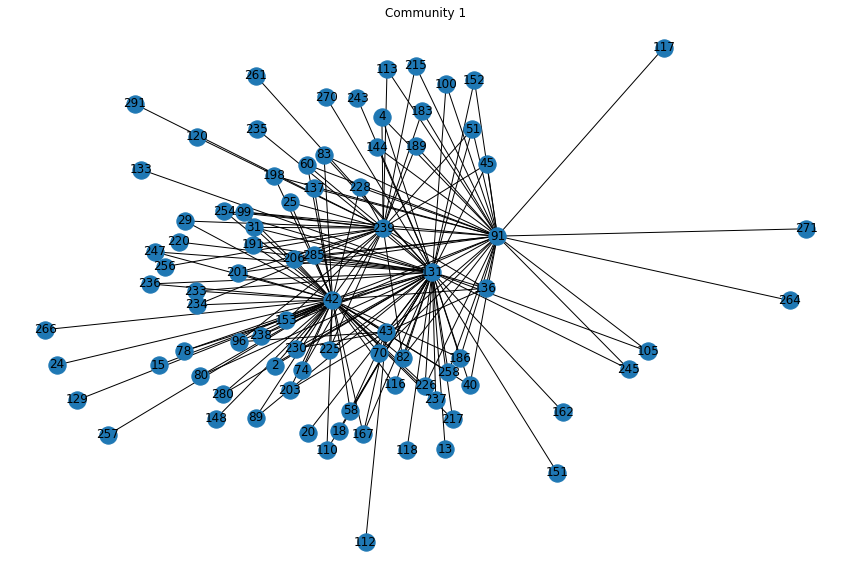

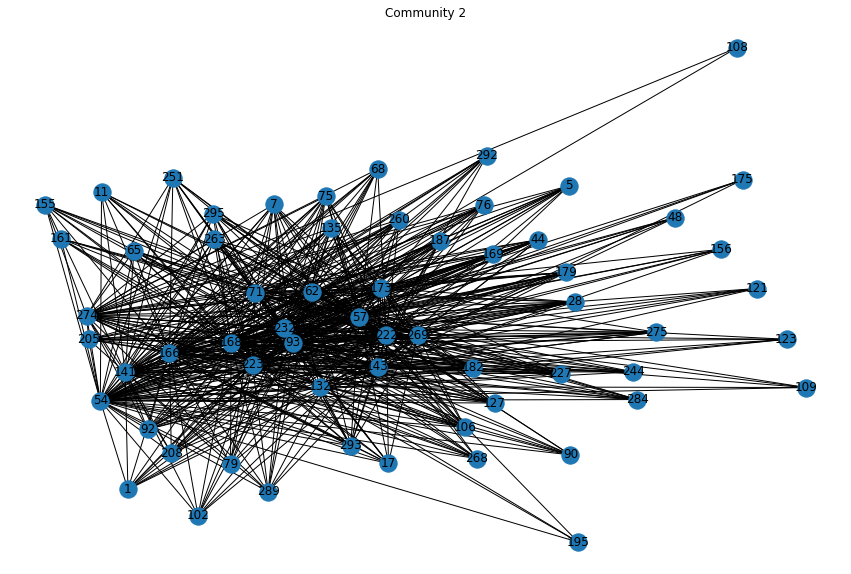

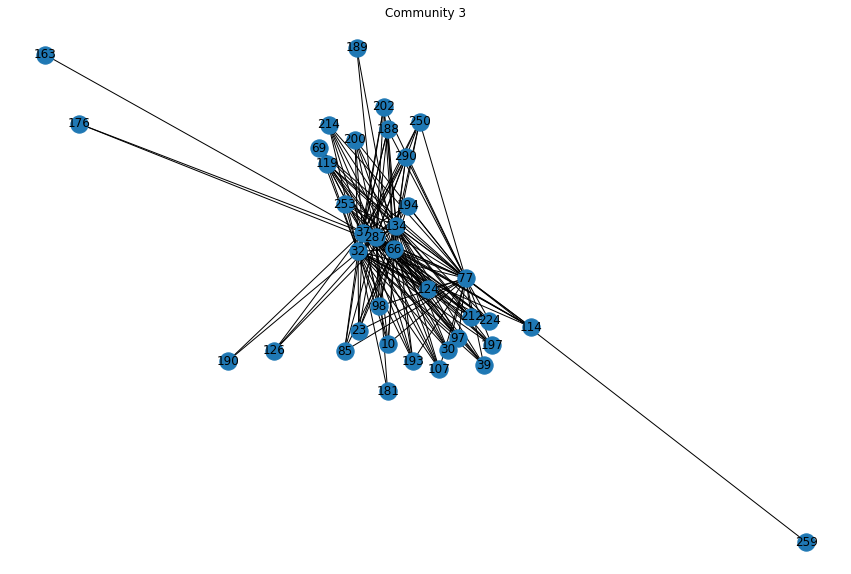

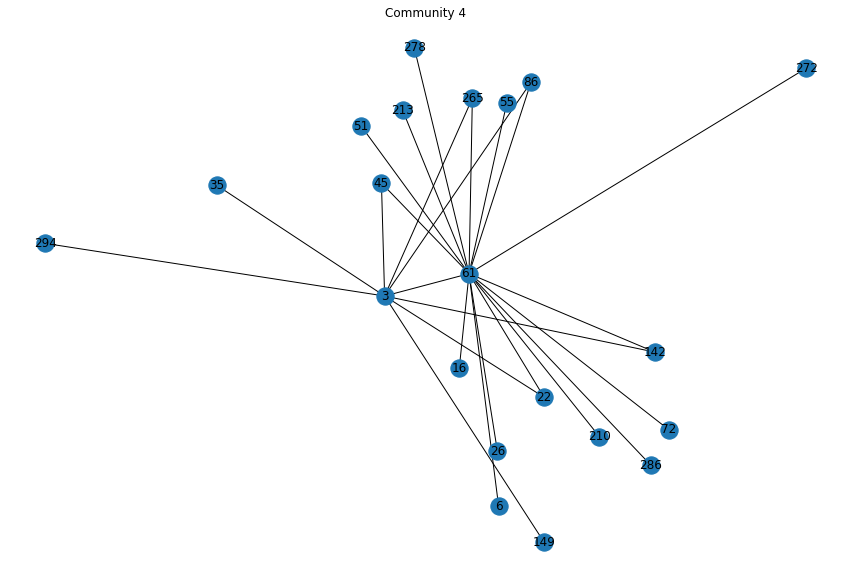

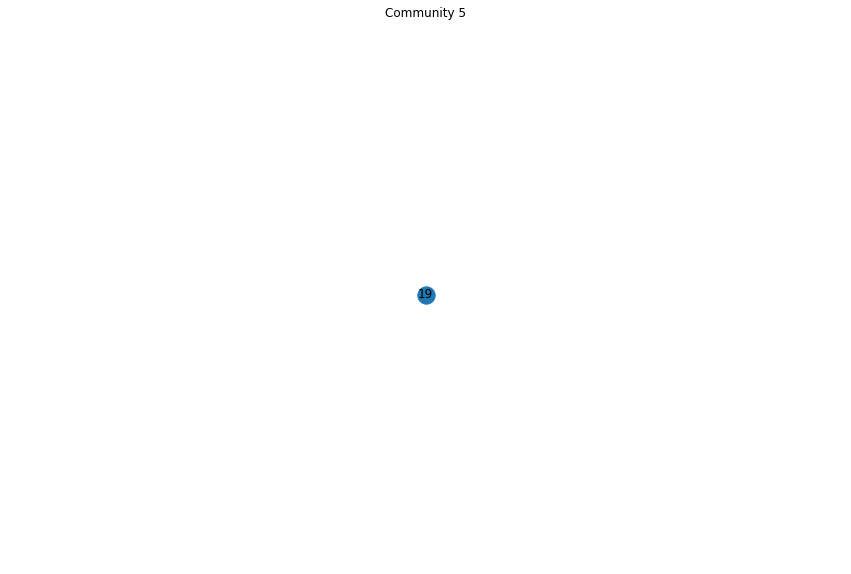

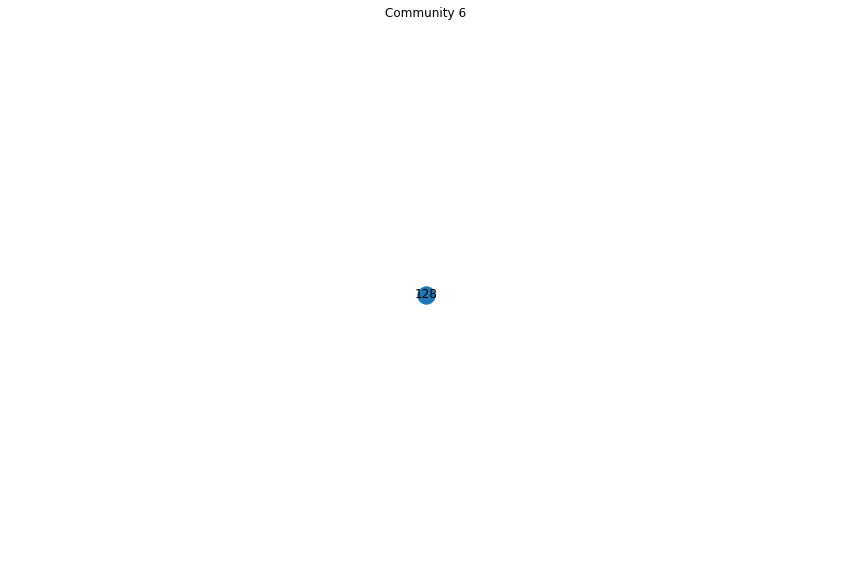

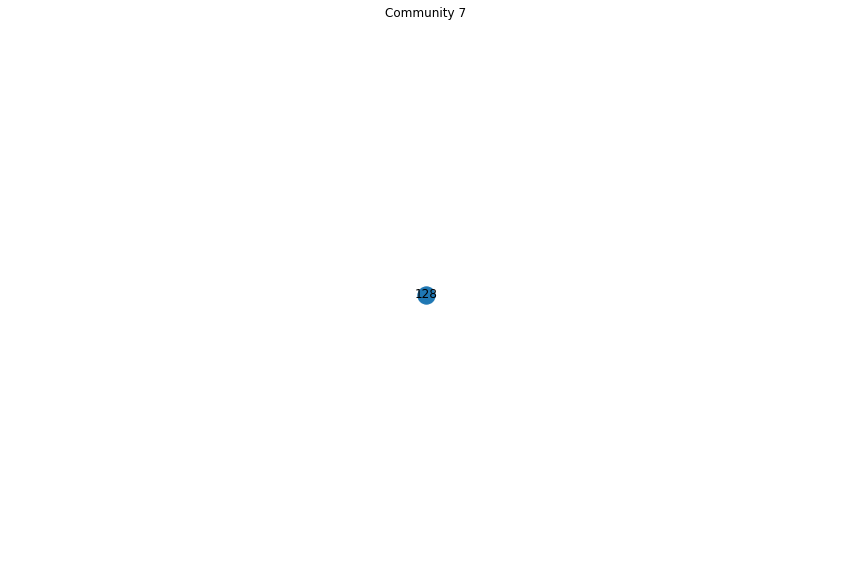

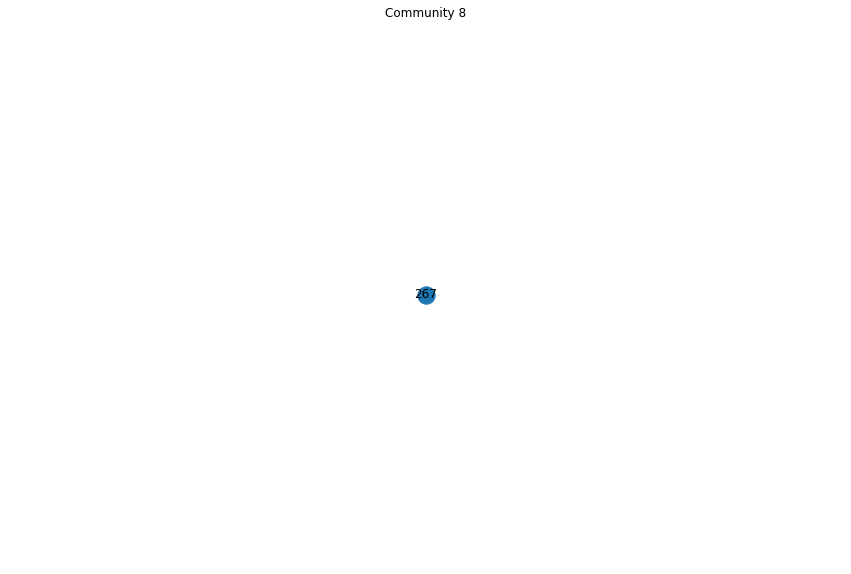

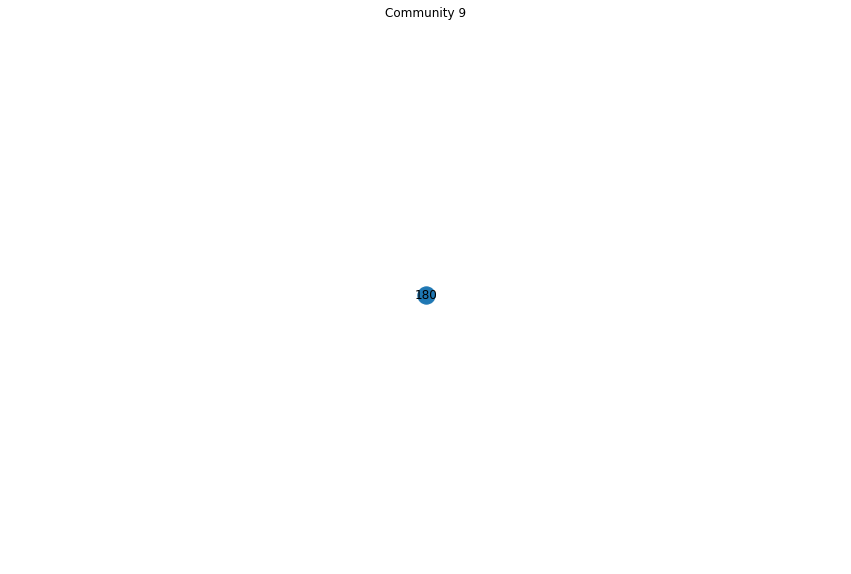

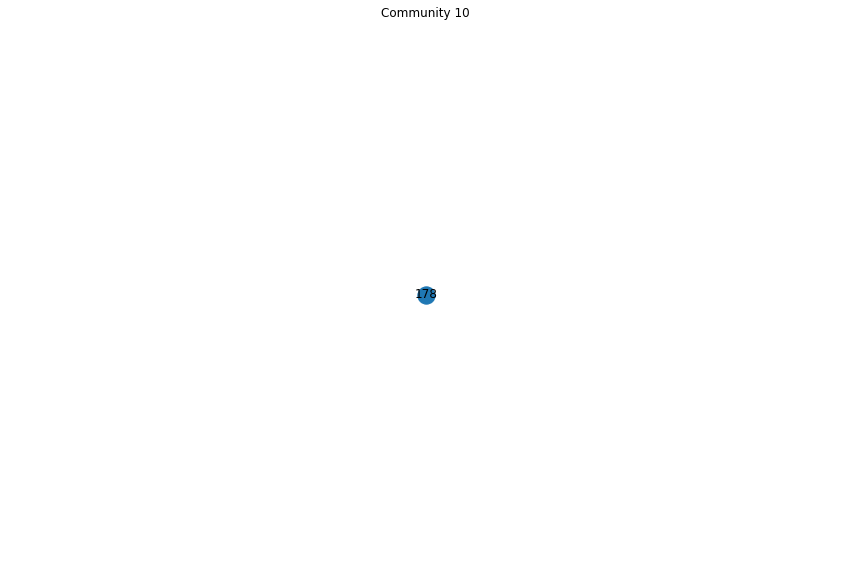

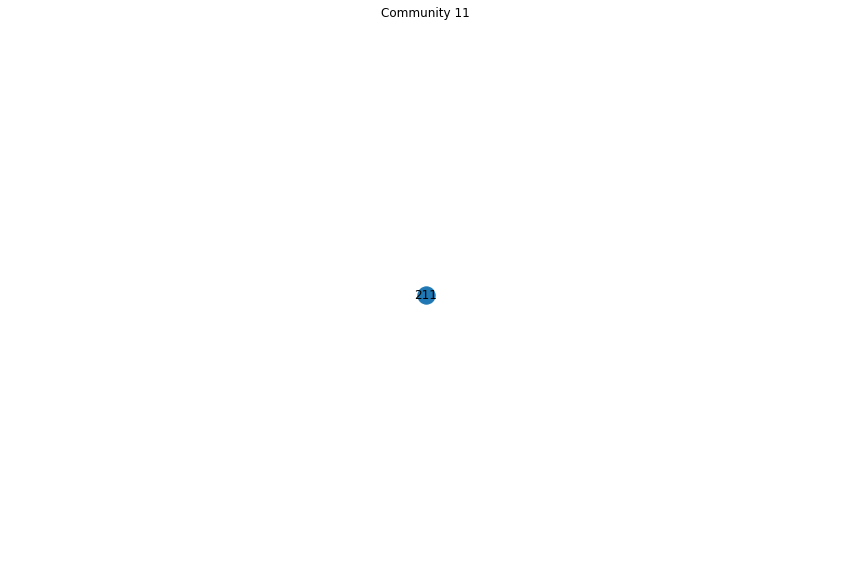

In [17]:
pos = nx.spring_layout(G)  # compute graph layout
for cmt_num in np.unique([v for c,v in cmt.items()]):
    partition = community.best_partition(G)

    nodelist = []
    # one community against the others
    for node, c in partition.items():
        if c == cmt_num:
            nodelist.append(node)
        else:
            partition[node] = -1  # put all the other communities in one communitiy
    
    sg = G.subgraph(nodelist)
   # edge_widths = [sg.edges[e]['Weight'] for e in sg.edges]
   # edge_widths = [w/np.quantile(edge_widths, 0.9) for w in edge_widths]
    
    fig, ax = plt.subplots(figsize=(15,10))
    nx.draw(sg, pos, with_labels=True) #, width=edge_widths)
    ax.set_title(f'Community {cmt_num}');

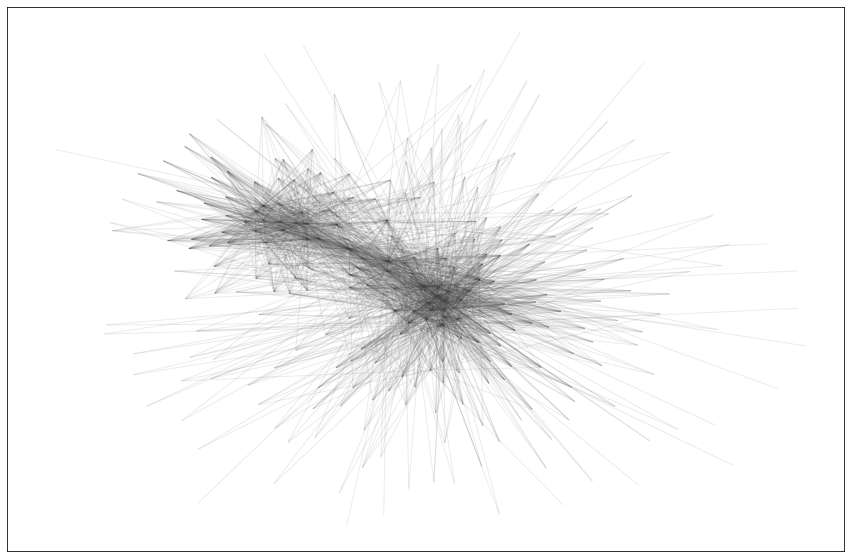

In [18]:
pos = nx.spring_layout(G, k=0.5)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(G, pos=pos, node_size=0, edge_color="#444444", alpha=0.10, with_labels=False)

### https://ericmjl.github.io/Network-Analysis-Made-Simple/2-networkx-basics-instructor.html

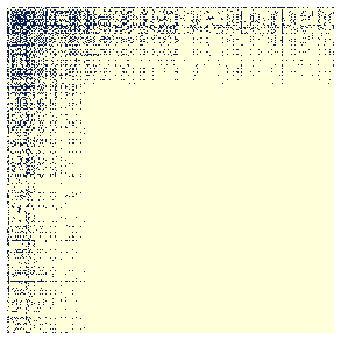

In [19]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()
plt.show()

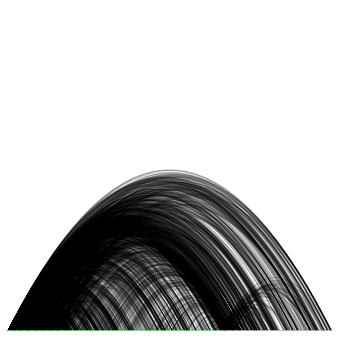

In [20]:
from nxviz import ArcPlot

a = ArcPlot(G, node_color='gender', node_grouping='gender')
a.draw()

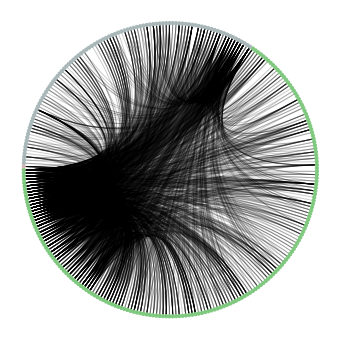

In [21]:
from nxviz import CircosPlot

c = CircosPlot(G, node_color='gender', node_grouping='gender')
c.draw()
#plt.savefig('images/seventh.png', dpi=300)

In [22]:
from hiveplot import HivePlot

nodes = dict()
nodes['male'] = [n for n,d in G.nodes(data=True) if d['gender'] == ' male']
nodes['female'] = [n for n,d in G.nodes(data=True) if d['gender'] == ' female']

edges = dict()
edges['group1'] = G.edges(data=True)

nodes_cmap = dict()
nodes_cmap['male'] = 'blue'
nodes_cmap['female'] = 'red'

edges_cmap = dict()
edges_cmap['group1'] = 'black'

KeyError: None

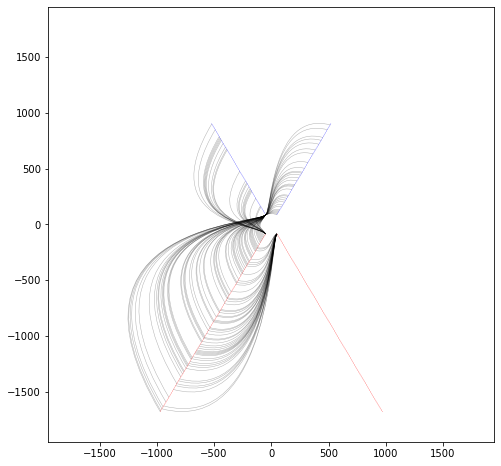

In [23]:
h = HivePlot(nodes, edges, nodes_cmap, edges_cmap)
#h.save('hiveplot.svg')
h.draw()

In [ ]:
#write an edgelist to file
#nx.write_edgelist(G,'edgelist.txt')

In [ ]:
for i in G.neighbors("121"):
    print(i)

In [ ]:
#df=pd.read_csv('../Data/AccEdgeFile.csv')

In [24]:
#df

In [25]:
#df['Originator'].unique()

In [26]:
from hiveplot import HivePlot

nodes = dict()
nodes['male'] = [n for n,d in G.nodes(data=True) if d['gender'] == ' male']
nodes['female'] = [n for n,d in G.nodes(data=True) if d['gender'] == ' female']

edges = dict()
edges['group1'] = G.edges(data=True)

nodes_cmap = dict()
nodes_cmap['male'] = 'blue'
nodes_cmap['female'] = 'red'

edges_cmap = dict()
edges_cmap['group1'] = 'black'

In [27]:
#t= nodes['female'] = [n for n,d in G.nodes(data=True) if d['gender'] == ' female']


In [28]:
#t

KeyError: None

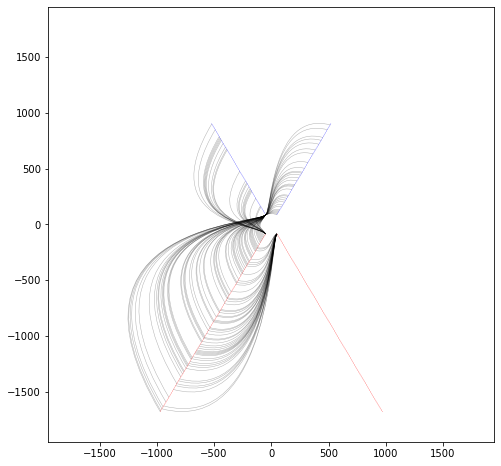

In [29]:
h = HivePlot(nodes, edges, nodes_cmap, edges_cmap)
#h.save('hiveplot.svg')
h.draw()

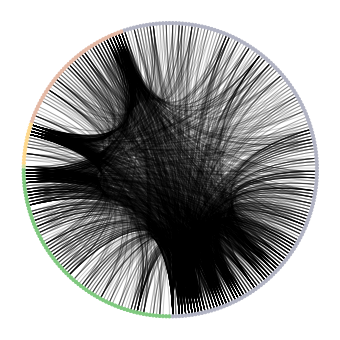

In [30]:
from nxviz import CircosPlot

c = CircosPlot(G, node_color='location', node_grouping='location')
c.draw()
#plt.savefig('images/seventh.png', dpi=300)

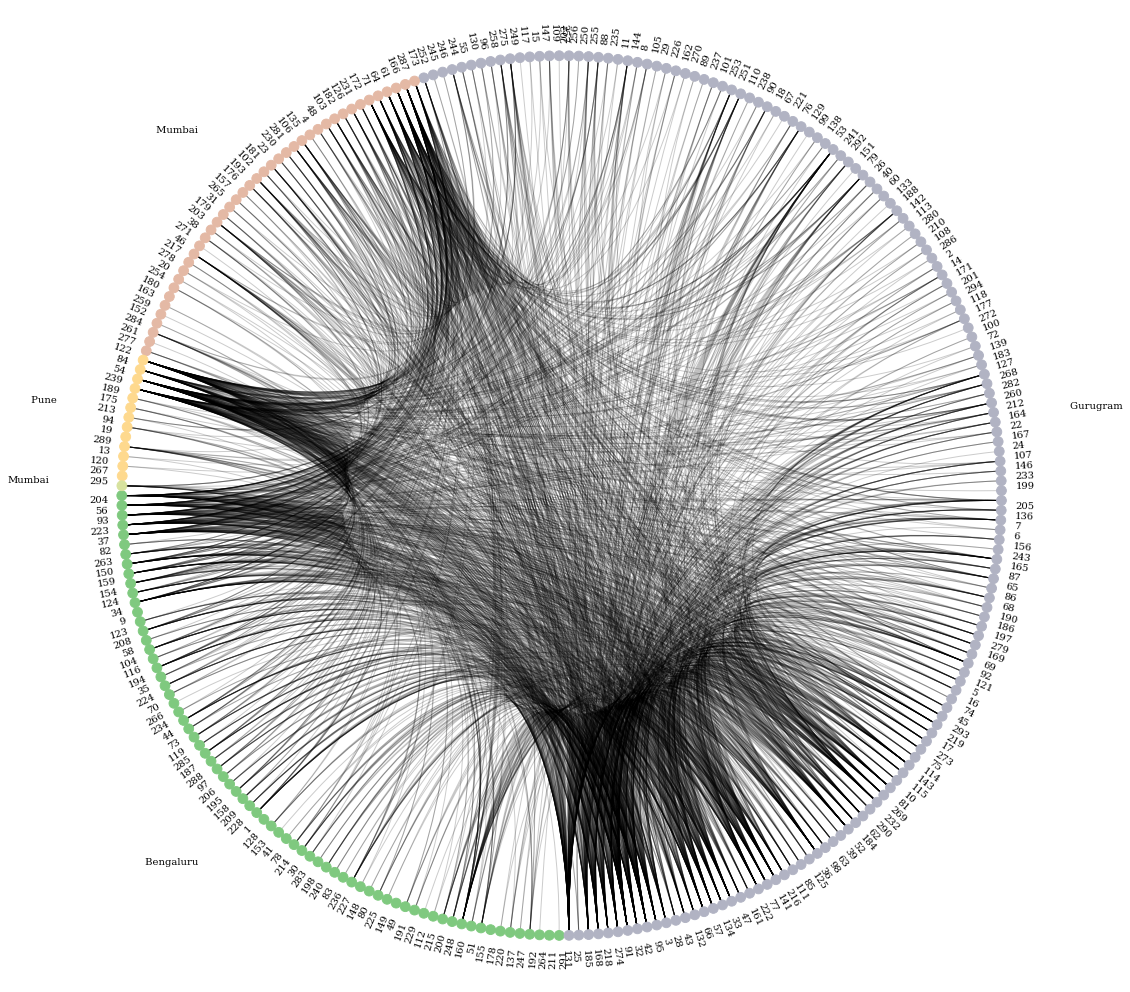

In [31]:
cmt = community.best_partition(G, weight='Weight')
c = nxv.CircosPlot(G, node_color='location', node_grouping='location',
                   #edge_width=(edges['Weight'] / edges['Weight'].quantile(0.97)).tolist(),
                   node_labels=True, node_label_layout='rotation',
                   group_label_position="middle", 
                   group_label_offset=12,
                   figsize=(30,18))
c.draw()

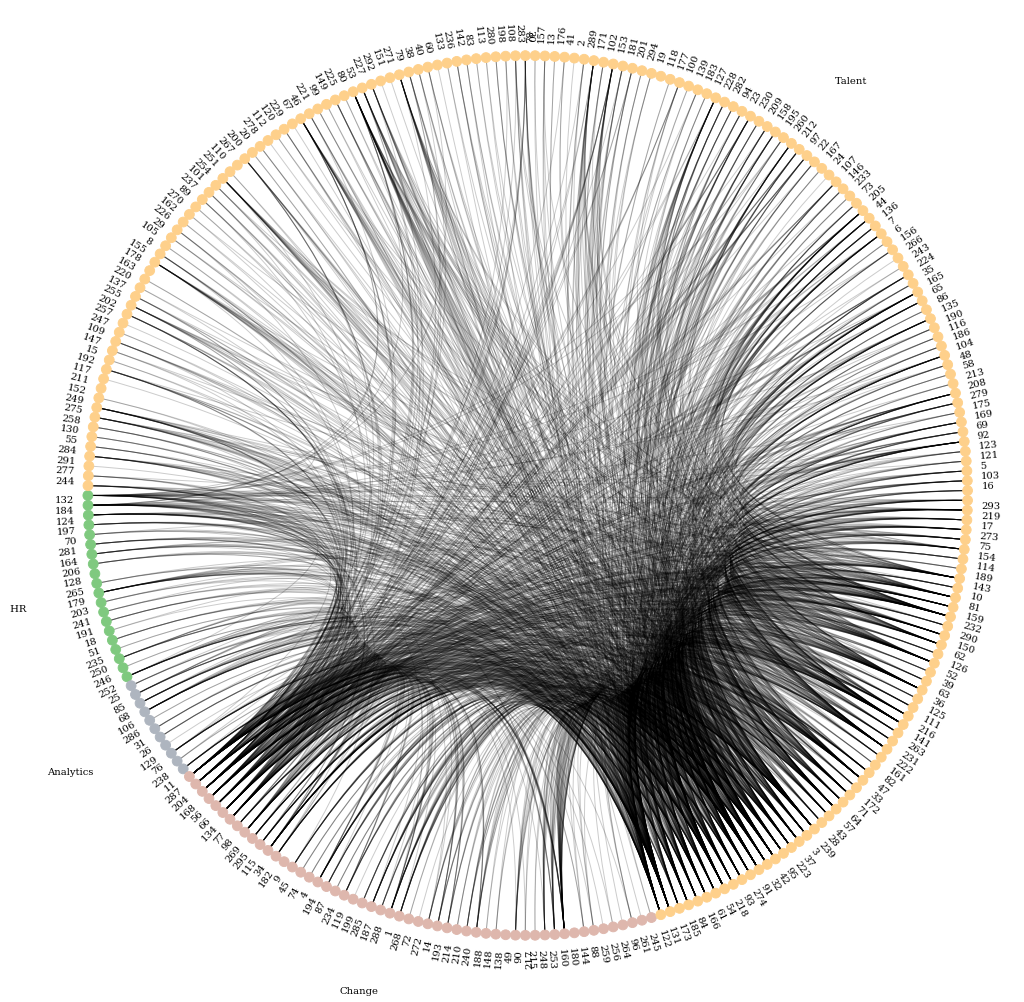

In [34]:
cmt = community.best_partition(G, weight='Weight')
c = nxv.CircosPlot(G, node_color='department', node_grouping='department',
                   #edge_width=(edges['Weight'] / edges['Weight'].quantile(0.97)).tolist(),
                   node_labels=True, node_label_layout='rotation',
                   group_label_position="middle", 
                   group_label_offset=12,
                   figsize=(30,18))
c.draw()

In [35]:
cliques = nx.find_cliques(G)
print(len(list(cliques)))


1703


In [36]:
list(cliques)

[]

In [37]:

 
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]
 
# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)
 
# Create the CircosPlot object: c
c = CircosPlot(G_lcnode_color='gender', node_grouping='gender',
                 
                   node_labels=True, node_label_layout='rotation',)
 
# Draw the CircosPlot to the screen
c.draw()
plt.show()

TypeError: __init__() missing 1 required positional argument: 'graph'

In [ ]:
cmt = community.best_partition(G, weight='Weight')
c = nxv.CircosPlot(G, node_color='gender', node_grouping='gender',
                   #edge_width=(edges['Weight'] / edges['Weight'].quantile(0.97)).tolist(),
                   node_labels=True, node_label_layout='rotation',
                   group_label_position="middle", 
                   group_label_offset=12,
                   figsize=(30,18))
c.draw()

In [ ]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])
 
# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  
 
# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))
 
# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
 
# Create the ArcPlot object: a
a = ArcPlot(graph=G_lmc, node_order='degree centrality')
 
# Draw the ArcPlot to the screen
a.draw()
plt.show()


In [ ]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict
 
# Initialize the defaultdict: recommended
recommended = defaultdict(int)
 
# Iterate over all the nodes in G
for n, d in G.nodes(data=True):
 
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
 
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
 
            # Increment recommended
            recommended[(n1, n2)] += 1
 
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

In [38]:
G.node['131']
{'bipartite': 'users', 'grouping': 0}
 
# get the value of degree
nx.degree(G, '131')
5
 
# set the value 'degree' to 5
G.node['131']['degree'] = nx.degree(G, '131')
 
# show the value
G.node['131']
{'bipartite': 'users', 'degree': 5, 'grouping': 0}
 
G.node['131']['degree']


156

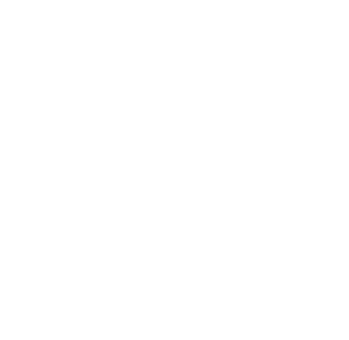

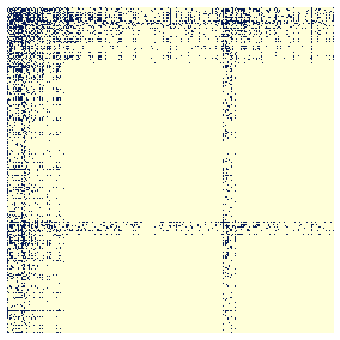

In [68]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]
 
# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs, node_grouping='level')
# Draw the MatrixPlot to the screen
h.draw()
plt.show()

In [43]:
 
# Import necessary modules
from itertools import combinations
from collections import defaultdict
 
# Initialize the defaultdict: recommended
recommended = defaultdict(int)
 
# Iterate over all the nodes in G
for n, d in G.nodes(data=True):
 
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
 
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
 
            # Increment recommended
            recommended[(n1, n2)] += 1
 
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('42', '239'), ('122', '131'), ('122', '91'), ('131', '32'), ('91', '95'), ('131', '166'), ('131', '168'), ('131', '274'), ('91', '32')]


In [66]:
nodes = dict()
nodes['gender'] = [n for n, d in G.nodes(data=True) if G['gender'] == 'male']
nodes['gender'] = [n for n, d in G.nodes(data=True) if G['female'] == 'B']

edges = dict()
edges['all'] = [(u, v, d) for u, v, d in p.edges(data=True)]

nodes_cmap = dict()
nodes_cmap['chainA'] = 'red'
nodes_cmap['chainB'] = 'blue'



KeyError: 'gender'

ZeroDivisionError: float division by zero

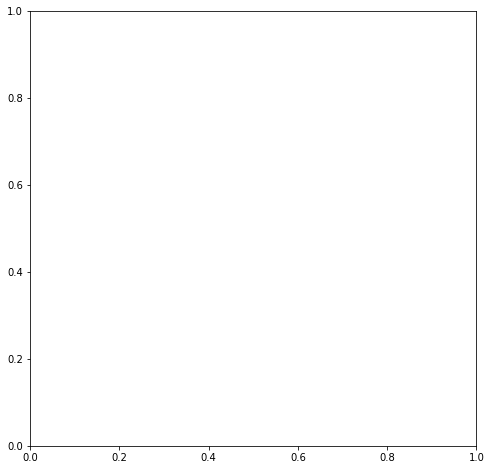

In [65]:
h = HivePlot(nodes, edges, nodes_cmap)
h.draw()
plt.savefig('protein_graph.pdf')